In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X,y = mnist['data'],mnist['target']

In [33]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [34]:
type(X)

pandas.core.frame.DataFrame

In [35]:
type(y)

pandas.core.series.Series

In [36]:
## Dataset contains image representations
# Each row has 784 columns or values, which can be converted to a 28 * 28 grid.
# Values range from 0(white) to 255(black)

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
type(X)

pandas.core.frame.DataFrame

In [80]:
some_digit = X.iloc[0:1,:]
some_digit_image = X.iloc[0:1,:].to_numpy().reshape(28,28)

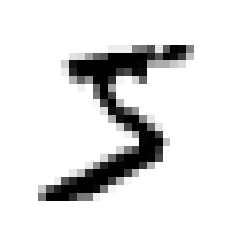

In [44]:
plt.imshow(some_digit_image,cmap = mpl.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [45]:
y[0]

'5'

In [57]:
y = y.astype(np.uint8)

In [58]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [62]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [69]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [70]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: uint8

In [71]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

### Training a binary classifier

In [60]:
## Building a '5' detector
## Two outcomes - 5 / not 5.

In [61]:
from sklearn.linear_model import SGDClassifier

In [72]:
sgd_clf = SGDClassifier(random_state = 42)

In [73]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [81]:
sgd_clf.predict(some_digit)

array([ True])

In [84]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Comparing with a classifier that predicts "Not a five every time."

In [86]:
from sklearn.base import BaseEstimator 

class Never5Classifier(BaseEstimator): 
    def fit(self, X, y=None): 
        pass 
    def predict(self, X): 
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])